In [ ]:
pip install -U scikit-learn  
pip install spacy 
!python -m spacy download es_core_news_sm


In [26]:
import pandas as pd  #import de libreria pandas
import re            #import de libreria regular expressions
import nltk
from nltk.tokenize import word_tokenize,wordpunct_tokenize,sent_tokenize
from nltk import pos_tag   # para etiquetado POS
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nidia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nidia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import es_core_news_sm
import spacy
pln = es_core_news_sm.load()

In [ ]:
#conteo por entidad para texto1
conteoc = df_e['entidad'].str.count('Concept').sum()
print( 'Concept:'+ str(conteoc))

conteoa = df_e['entidad'].str.count('Action').sum()
print('Action: '+str(conteoa))

conteop = df_e['entidad'].str.count('Predicate').sum()
print('Predicate: '+str(conteop))

conteor = df_e['entidad'].str.count('Reference').sum()
print('Action: '+str(conteor))

print('Total:'+str(conteoc+conteoa+conteop+conteor))


In [6]:
df_ann=pd.read_csv("3output_train.ann", encoding='utf-8',delimiter='\t')
    #Entidad
df_e=df_ann.query("T.str.match('T[0-9]*') and (entidad.str.match('Concept ') or entidad.str.match('Action ') or entidad.str.match('Predicate ') or entidad.str.match('Reference '))")

    #cargar texto 1
with open("3input_train.txt", encoding="utf-8") as archivo:
    contenido = archivo.read()

In [196]:
def procesa_texto(namfileann, namefiletext):
    df=pd.DataFrame(columns=['Entidad', 'EntidadPOS','EPOS','Contexto','ContextoPOS','POS', 'ContextoNER','NER','TipoEntidad'])
    df_ann=pd.read_csv(namfileann, encoding='utf-8',delimiter='\t')
    #Entidad
    df_e=df_ann.query("T.str.match('T[0-9]*') and (entidad.str.match('Concept ') or entidad.str.match('Action ') or entidad.str.match('Predicate ') or entidad.str.match('Reference '))")
    #cargar texto 
    with open(namefiletext, encoding="utf-8") as archivo:
        contenido = archivo.read()
        #print(contenido)
    
    #df=pd.DataFrame(columns=['Entidad', 'EntidadPOS','EPOS','Contexto','ContextoPOS','POS', 'ContextoNER','NER','TipoEntidad'])
    for index, row in df_e.iterrows():
        #se extrae cada anotación
        #print("Palabra******************")
        #print(index,  row['entidad'],row['desc'])
        #print(df_e.count())
        tipoentidad=re.findall('[a-zA-Z]+',row['entidad'])
        tipoentidad=" ".join(tipoentidad)
        entidad=row['desc']
        #print(entidad)
        #se identifica el patron de las posiciones de la palabra
        posiciones=re.findall('[0-9]+',str(row['entidad']))
        #print(posiciones)
        inicio= int(posiciones[0])
        fin= int(posiciones[-1])
        palabra = contenido[inicio:fin]
        ltext=len(contenido)
        #print(palabra)
        vcontext=100;
        if (inicio-vcontext<0):
            icontexto=0; 
        else:
            icontexto=inicio-vcontext;
        if fin+vcontext >ltext:
            fcontexto=ltext
        else:
            fcontexto= fin+vcontext
        contextol = contenido[icontexto:inicio]
        contextor = contenido[fin:fcontexto]
        #print("contexto izquierda:-------------------")
        #print(contextol)
        sentenciasl=sent_tokenize(contextol)
        if len(sentenciasl)!=0:
            #print(sentenciasl)
            #obtener la ultima sentencia
            sentl=sentenciasl[-1]
            #print(sentl)
            lpalabras=sentl.split(" ")
            cincopalabrasl=lpalabras[-5:]
            cizquierda=" ".join(cincopalabrasl)
        else:
            cizquierda=""
        #print ("5 palabras a la izquierda:" +cizquierda)
        #print("contexto derecha:--------------------")
        #print(contextor)
        sentenciasr=sent_tokenize(contextor)
        if len(sentenciasr)!=0:
            sentr=sentenciasr[0].lstrip()
         #   print(sentr)
            rpalabras=sentr.split(" ")
            #print(rpalabras)
            cincopalabrasr=rpalabras[0:5]
            cderecha=" ".join(cincopalabrasr)
            #print ("5 palabras a la derecha:" +cderecha)
            #obtener la primera sentencia
            #print(sentenciasr[0])
        else:
            cderecha=""
        
        pos_tags=pos_tag(word_tokenize(entidad))
        #print(pos_tags)
        #print("Segundos: ")
        #print(pos_tags[0])

        segundos=[par[1] for par in pos_tags]
        cadena_POS = ' '.join(str(segundo) for segundo in segundos)
        
        #pos_tagsC=pos_tag(word_tokenize(cizquierda+' '+cderecha))
        pos_tagsC=pos_tag(word_tokenize(cizquierda+' '+cderecha))
        segundos2=[par2[1] for par2 in pos_tagsC]
        #cPOS = ' '.join(str(segundo2) for segundo2 in segundos2)
        #print(cadena_POS)
         
        texto = pln(cizquierda+' '+cderecha)
        textoner = pln(cizquierda+' '+entidad+' '+cderecha)
        ContextoNER=''
        ContextoPOS=''
        CNER=''
        cPOS=''
        ePOS=''
        cad_E_POS=''
        for palabra in texto: 
            palabra_orignal=palabra.text
            ner=palabra.ent_type_
            pos=palabra.pos_
           # print( palabra_orignal+ '\t' + pos + '\t' + ner)
            ContextoNER = ContextoNER+' '+palabra_orignal+ '->' + str(ner)
            ContextoPOS = ContextoPOS+' '+palabra_orignal+ ' ' + str(pos) 
            cPOS = cPOS+ ' ' + str(pos)
            CNER = CNER+ ' ' + str(ner)
        textoentidad =pln(entidad)
        for ent in textoentidad:
            entidad_original=ent.text
            entpos=ent.pos_
            ePOS = ePOS+ ' '+ entidad_original+' '+ str(entpos)
            cad_E_POS=cad_E_POS+' '+str(entpos)
        #for palabraner in textoner: 
            #palabra_orignal=palabraner.text
            #ner=palabraner.ent_type_
            #print( palabra_orignal+ '\t'  + ner)
            #ContextoNER = ContextoNER+' '+palabra_orignal+ '->' + str(ner) 
            #CNER = CNER+ ' ' + str(ner)
    
        #registro ={'Entidad':entidad, 'EntidadPOS':str(pos_tags) ,'EPOS':cadena_POS ,'Contexto':cizquierda+' @ent '+cderecha,'ContextoPOS':str(pos_tagsC),'POS':cPOS ,'ContextoNER':ContextoNER,'NER':CNER,'TipoEntidad':str(tipoentidad)}
        registro ={'Entidad':entidad, 'EntidadPOS':str(ePOS) ,'EPOS':cad_E_POS ,'Contexto':cizquierda+' @ent '+cderecha,'ContextoPOS':str(ContextoPOS),'POS':cPOS ,'ContextoNER':ContextoNER,'NER':CNER,'TipoEntidad':str(tipoentidad)}
        ndf=pd.DataFrame(registro,index=[0])
        # Agregar el nuevo registro al DataFrame
        df = pd.concat([df,ndf], ignore_index=True)
    return df
        

In [245]:
len(df_texto1) +len(df_texto2)+len(df_texto3)
#len(df_salida)

2145

In [244]:
conteo= df_salida.groupby('TipoEntidad').count()
print(conteo)

             Entidad  EntidadPOS  EPOS  Contexto  ContextoPOS   POS  \
TipoEntidad                                                           
Action           512         512   512       512          512   512   
Concept         1388        1388  1388      1388         1388  1388   
Predicate        190         190   190       190          190   190   
Reference         55          55    55        55           55    55   

             ContextoNER   NER  Indice  
TipoEntidad                             
Action               512   512     512  
Concept             1388  1388    1388  
Predicate            190   190     190  
Reference             55    55      55  


In [197]:
df_texto1=procesa_texto('1output_train.ann','1input_train.txt')
df_texto2=procesa_texto('2output_train.ann','2input_train.txt')
df_texto3=procesa_texto('3output_train.ann','3input_train.txt')

df_salida=pd.concat([df_texto1,df_texto2,df_texto3], ignore_index=True)

In [186]:
df_texto1=procesa_texto('output_train.ann','input_train.txt')
df_texto2=procesa_texto('output_dev.ann','input_dev.txt')
#df_texto3=procesa_texto('3output_train.ann','3input_train.txt')

df_salida=pd.concat([df_texto1,df_texto2], ignore_index=True)

In [198]:
df_salida.to_csv('salida.csv',index=False)

In [199]:
df_salida

Entidad                   EntidadPOS        EPOS  \
0     sistema vascular   sistema NOUN vascular VERB   NOUN VERB   
1                  red                     red NOUN        NOUN   
2     vasos sanguíneos    vasos NOUN sanguíneos ADJ    NOUN ADJ   
3               cuerpo                  cuerpo NOUN        NOUN   
4              columna                 columna NOUN        NOUN   
...                ...                          ...         ...   
2140            impide                  impide VERB        VERB   
2141           oxígeno                  oxígeno ADJ         ADJ   
2142            llegue                  llegue VERB        VERB   
2143          pulmones                pulmones NOUN        NOUN   
2144           cerebro                 cerebro NOUN        NOUN   

                                               Contexto  \
0                            El @ent es la red de vasos   
1     El sistema vascular es la @ent de vasos sanguí...   
2                vascular es la red de @ent del cuerpo.   
3                    red de vasos sanguíneos del @ent .   
4                      La @ent de cenizas se ha elevado   
...                                                 ...   
2140                  Esto @ent que el oxígeno llegue a   
2141    Esto impide que el @ent llegue a los pulmones y   
2142  Esto impide que el oxígeno @ent a los pulmones...   
2143         el oxígeno llegue a los @ent y al cerebro.   
2144                         a los pulmones y al @ent .   

                                            ContextoPOS  \
0       El DET es AUX la DET red NOUN de ADP vasos NOUN   
1      El DET sistema NOUN vascular VERB es AUX la D...   
2      vascular VERB es AUX la DET red NOUN de ADP d...   
3      red NOUN de ADP vasos NOUN sanguíneos ADJ del...   
4      La DET de ADP cenizas NOUN se PRON ha AUX ele...   
...                                                 ...   
2140   Esto PRON que SCONJ el DET oxígeno NOUN llegu...   
2141   Esto PRON impide VERB que SCONJ el DET llegue...   
2142   Esto PRON impide VERB que SCONJ el DET oxígen...   
2143   el DET oxígeno NOUN llegue VERB a ADP los DET...   
2144   a ADP los DET pulmones NOUN y CCONJ al ADP . ...   

                                                    POS  \
0                             DET AUX DET NOUN ADP NOUN   
1      DET NOUN VERB AUX DET ADP NOUN ADJ ADP NOUN P...   
2                  VERB AUX DET NOUN ADP ADP NOUN PUNCT   
3                           NOUN ADP NOUN ADJ ADP PUNCT   
4                            DET ADP NOUN PRON AUX VERB   
...                                                 ...   
2140                       PRON SCONJ DET NOUN VERB ADP   
2141        PRON VERB SCONJ DET VERB ADP DET NOUN CCONJ   
2142    PRON VERB SCONJ DET NOUN ADP DET NOUN CCONJ ADP   
2143         DET NOUN VERB ADP DET CCONJ ADP NOUN PUNCT   
2144                       ADP DET NOUN CCONJ ADP PUNCT   

                                            ContextoNER  \
0                     El-> es-> la-> red-> de-> vasos->   
1      El-> sistema-> vascular-> es-> la-> de-> vaso...   
2      vascular-> es-> la-> red-> de-> del-> cuerpo-...   
3      red->MISC de->MISC vasos->MISC sanguíneos->MI...   
4               La-> de-> cenizas-> se-> ha-> elevado->   
...                                                 ...   
2140           Esto-> que-> el-> oxígeno-> llegue-> a->   
2141   Esto-> impide-> que-> el-> llegue-> a-> los->...   
2142   Esto-> impide-> que-> el-> oxígeno-> a-> los-...   
2143   el-> oxígeno-> llegue-> a-> los-> y-> al-> ce...   
2144                  a-> los-> pulmones-> y-> al-> .->   

                         NER TipoEntidad  
0                                Concept  
1                              Predicate  
2                                Concept  
3      MISC MISC MISC MISC       Concept  
4                                Concept  
...                      ...         ...  
2140                              Action  
2141                          

In [200]:
df_salida['Indice']=df_salida.index
#df.rename(columns={df.columns[9]: 'Indice'}, inplace=True)


In [201]:
df_salida

Entidad                   EntidadPOS        EPOS  \
0     sistema vascular   sistema NOUN vascular VERB   NOUN VERB   
1                  red                     red NOUN        NOUN   
2     vasos sanguíneos    vasos NOUN sanguíneos ADJ    NOUN ADJ   
3               cuerpo                  cuerpo NOUN        NOUN   
4              columna                 columna NOUN        NOUN   
...                ...                          ...         ...   
2140            impide                  impide VERB        VERB   
2141           oxígeno                  oxígeno ADJ         ADJ   
2142            llegue                  llegue VERB        VERB   
2143          pulmones                pulmones NOUN        NOUN   
2144           cerebro                 cerebro NOUN        NOUN   

                                               Contexto  \
0                            El @ent es la red de vasos   
1     El sistema vascular es la @ent de vasos sanguí...   
2                vascular es la red de @ent del cuerpo.   
3                    red de vasos sanguíneos del @ent .   
4                      La @ent de cenizas se ha elevado   
...                                                 ...   
2140                  Esto @ent que el oxígeno llegue a   
2141    Esto impide que el @ent llegue a los pulmones y   
2142  Esto impide que el oxígeno @ent a los pulmones...   
2143         el oxígeno llegue a los @ent y al cerebro.   
2144                         a los pulmones y al @ent .   

                                            ContextoPOS  \
0       El DET es AUX la DET red NOUN de ADP vasos NOUN   
1      El DET sistema NOUN vascular VERB es AUX la D...   
2      vascular VERB es AUX la DET red NOUN de ADP d...   
3      red NOUN de ADP vasos NOUN sanguíneos ADJ del...   
4      La DET de ADP cenizas NOUN se PRON ha AUX ele...   
...                                                 ...   
2140   Esto PRON que SCONJ el DET oxígeno NOUN llegu...   
2141   Esto PRON impide VERB que SCONJ el DET llegue...   
2142   Esto PRON impide VERB que SCONJ el DET oxígen...   
2143   el DET oxígeno NOUN llegue VERB a ADP los DET...   
2144   a ADP los DET pulmones NOUN y CCONJ al ADP . ...   

                                                    POS  \
0                             DET AUX DET NOUN ADP NOUN   
1      DET NOUN VERB AUX DET ADP NOUN ADJ ADP NOUN P...   
2                  VERB AUX DET NOUN ADP ADP NOUN PUNCT   
3                           NOUN ADP NOUN ADJ ADP PUNCT   
4                            DET ADP NOUN PRON AUX VERB   
...                                                 ...   
2140                       PRON SCONJ DET NOUN VERB ADP   
2141        PRON VERB SCONJ DET VERB ADP DET NOUN CCONJ   
2142    PRON VERB SCONJ DET NOUN ADP DET NOUN CCONJ ADP   
2143         DET NOUN VERB ADP DET CCONJ ADP NOUN PUNCT   
2144                       ADP DET NOUN CCONJ ADP PUNCT   

                                            ContextoNER  \
0                     El-> es-> la-> red-> de-> vasos->   
1      El-> sistema-> vascular-> es-> la-> de-> vaso...   
2      vascular-> es-> la-> red-> de-> del-> cuerpo-...   
3      red->MISC de->MISC vasos->MISC sanguíneos->MI...   
4               La-> de-> cenizas-> se-> ha-> elevado->   
...                                                 ...   
2140           Esto-> que-> el-> oxígeno-> llegue-> a->   
2141   Esto-> impide-> que-> el-> llegue-> a-> los->...   
2142   Esto-> impide-> que-> el-> oxígeno-> a-> los-...   
2143   el-> oxígeno-> llegue-> a-> los-> y-> al-> ce...   
2144                  a-> los-> pulmones-> y-> al-> .->   

                         NER TipoEntidad  Indice  
0                                Concept       0  
1                              Predicate       1  
2                                Concept       2  
3      MISC MISC MISC MISC       Concept       3  
4                                Concept       4  
...                      ...         ...     ...  
2140             

In [202]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Crear un objeto TfidfVectorizer
#vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

# Ajustar el vectorizador en los datos de entrada
vectorizer.fit(df_salida['EPOS'])

# Transformar los datos de entrada en la matriz COUNT
cdf_matrix = vectorizer.transform(df_salida['EPOS'])

# Obtener el diccionario de términos del vectorizador
terms_dict = vectorizer.vocabulary_

# Obtener los nombres de los términos a partir del diccionario de términos
feature_names = [term for term, index in sorted(terms_dict.items(), key=lambda x: x[1])]

# Convertir la matriz de TF-IDF en un DataFrame de pandas
countdfEntidad = pd.DataFrame(cdf_matrix.todense(), columns=feature_names)

In [203]:
countdfEntidad['Indice']=countdfEntidad.index
countdfEntidad.to_csv('conteoENTIDADES.csv',index=False)
#countdfEntidad
Cdf1=pd.merge(countdfEntidad,df_salida[['TipoEntidad','Indice']], on='Indice')
Cdf1.to_csv('Cdf1.csv',index=False)
Cdf1


adj  adp  adv  aux  cconj  det  noun  num  pron  propn  punct  sconj  \
0       0    0    0    0      0    0     1    0     0      0      0      0   
1       0    0    0    0      0    0     1    0     0      0      0      0   
2       1    0    0    0      0    0     1    0     0      0      0      0   
3       0    0    0    0      0    0     1    0     0      0      0      0   
4       0    0    0    0      0    0     1    0     0      0      0      0   
...   ...  ...  ...  ...    ...  ...   ...  ...   ...    ...    ...    ...   
2140    0    0    0    0      0    0     0    0     0      0      0      0   
2141    1    0    0    0      0    0     0    0     0      0      0      0   
2142    0    0    0    0      0    0     0    0     0      0      0      0   
2143    0    0    0    0      0    0     1    0     0      0      0      0   
2144    0    0    0    0      0    0     1    0     0      0      0      0   

      verb  Indice TipoEntidad  
0        1       0     Concept  
1        0       1   Predicate  
2        0       2     Concept  
3        0       3     Concept  
4        0       4     Concept  
...    ...     ...         ...  
2140     1    2140      Action  
2141     0    2141     Concept  
2142     1    2142      Action  
2143     0    2143     Concept  
2144     0    2144     Concept  

[2145 rows x 15 columns]

In [231]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, tree, neighbors
from sklearn.model_selection import train_test_split
#perceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import numpy as np

# lectura del archivo de caracteristicas de los textos
archivo = "Cdf1.csv"
conjuntoTextos = pd.read_csv(archivo,encoding='ISO-8859-1')
#print(conjuntoTextos)
print("Caracteristicas entidad")

# Divide el conjunto en X (características) y Y (listado de clases)
# Valores para TFIDF (Cdf1.csv= 13,Cdf2=22 ,Cdf3=4,cdf5= 39) cantidad de palabras en el diccionario)
X = conjuntoTextos.iloc[:, :13].values
Y = conjuntoTextos['TipoEntidad'].values

# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba) = train_test_split(X, Y, test_size=0.20)
print("Cantidad de textos de entrenamiento: ", len(Y_entrenamiento))
print("Cantidad de textos de prueba: ",len(Y_prueba))


# Entrena con los conjuntos (X,Y_entrenamiento), genera el modelo, clasifica y evalua con los conjuntos (X,Y_prueba)
# Utilizando el algoritmo K-NN con 3 vecinos
clasificadorKNN = neighbors.KNeighborsClassifier(n_neighbors=7,weights='distance')
clasificadorKNN.fit(X_entrenamiento, Y_entrenamiento)
precisionKNNEnt = clasificadorKNN.score(X_prueba, Y_prueba)

# Obtiene e imprime las clases asignadas
#print(Y_prueba)
clasesAsignadas = clasificadorKNN.predict(X_prueba)
#print(clasesAsignadas)
print("Precisión del algoritmo K-NN: ",precisionKNNEnt*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Maquinas de soporte vectorial
clasificadorSVM = svm.SVC()
clasificadorSVM.fit(X_entrenamiento, Y_entrenamiento)
precisionSVMEnt = clasificadorSVM.score(X_prueba, Y_prueba)
print("Precisión del algoritmo SVM: ",precisionSVMEnt*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Arboles de Decisión
clasificadorArboles = tree.DecisionTreeClassifier()
clasificadorArboles = clasificadorArboles.fit(X_entrenamiento, Y_entrenamiento)
precisionArbolesEnt = clasificadorArboles.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Arboles: ",precisionArbolesEnt*100)

# Creamos un objeto Perceptron y lo ajustamos a los datos
clf = Perceptron()
clf.fit(X_entrenamiento, Y_entrenamiento)
# Hacemos una predicción sobre un nuevo conjunto de datos
Y_pred = clf.predict(X_prueba)

precisionPerceptronEnt = clf.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Perceptron: ",precisionPerceptronEnt*100)



# Compara los resultados de los tres algoritmos mediante gráficas
#plt.title("Comparacion de Algoritmos")
#plt.xlabel('Algoritmos')
#plt.ylabel('Precision')
#plt.plot([1,2,3,4],[precisionKNNEnt,precisionSVMEnt,precisionArbolesEnt,precisionPerceptronEnt], 'b--')
#plt.text(1, 0, 'precisionKNN', ha='center')
#plt.text(2, 0, 'precisionSVM', ha='center')
#plt.text(3, 0, 'precisionArboles', ha='center')
#plt.text(4, 0, 'precisionPerceptron', ha='center')

#plt.axis([1, 4, 0, 1])

#plt.show()

#print(Y_prueba)

Caracteristicas entidad
Cantidad de textos de entrenamiento:  1716
Cantidad de textos de prueba:  429
Precisión del algoritmo K-NN:  79.02097902097903
Precisión del algoritmo SVM:  80.41958041958041
Precisión del algoritmo Arboles:  79.95337995337995
Precisión del algoritmo Perceptron:  79.72027972027972


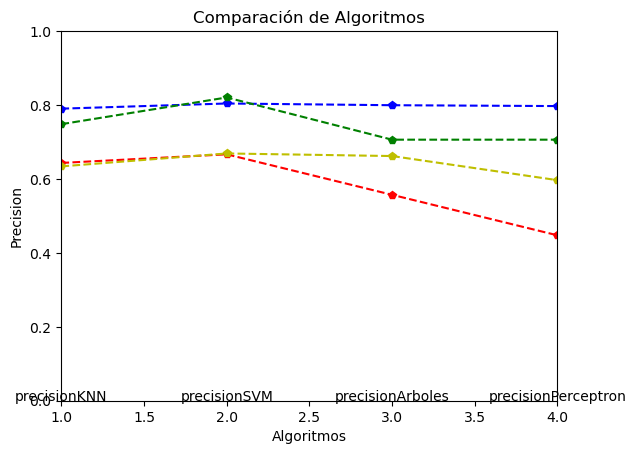

In [255]:
# Compara los resultados de los tres algoritmos mediante gráficas
plt.title("Comparación de Algoritmos")
plt.xlabel('Algoritmos')
plt.ylabel('Precision')
plt.plot([1,2,3,4],[precisionKNNEnt,precisionSVMEnt,precisionArbolesEnt,precisionPerceptronEnt], 'pb--')
plt.plot([1,2,3,4],[precisionKNNConP,precisionSVMConP,precisionArbolesConP,precisionPerceptronConP], 'pr--')
plt.plot([1,2,3,4],[precisionKNNConN,precisionSVMConN,precisionArbolesConN,precisionPerceptronConN], 'py--')
plt.plot([1,2,3,4],[precisionKNNEPN,precisionSVMEPN,precisionArbolesEPN,precisionPerceptronEPN], 'pg--')
plt.text(1, 0, 'precisionKNN', ha='center')
plt.text(2, 0, 'precisionSVM', ha='center')
plt.text(3, 0, 'precisionArboles', ha='center')
plt.text(4, 0, 'precisionPerceptron', ha='center')

plt.axis([1, 4, 0, 1])

plt.show()

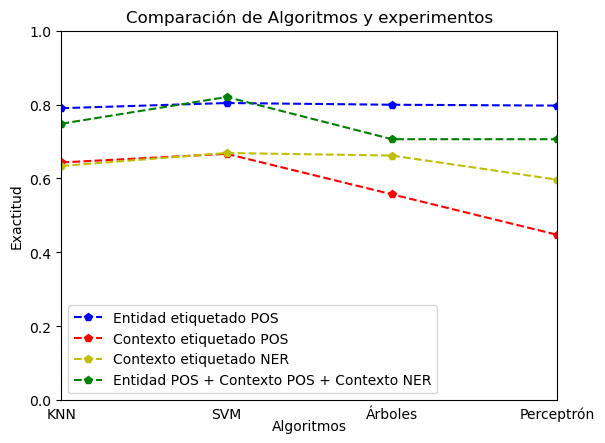

In [265]:
plt.title("Comparación de Algoritmos y experimentos")
plt.xlabel('Algoritmos',labelpad=10)
plt.ylabel('Exactitud')

# Trazar las líneas y agregar etiquetas
plt.plot([1,2,3,4],[precisionKNNEnt,precisionSVMEnt,precisionArbolesEnt,precisionPerceptronEnt], 'pb--', label='Entidad etiquetado POS')
plt.plot([1,2,3,4],[precisionKNNConP,precisionSVMConP,precisionArbolesConP,precisionPerceptronConP], 'pr--', label='Contexto etiquetado POS')
plt.plot([1,2,3,4],[precisionKNNConN,precisionSVMConN,precisionArbolesConN,precisionPerceptronConN], 'py--', label='Contexto etiquetado NER')
plt.plot([1,2,3,4],[precisionKNNEPN,precisionSVMEPN,precisionArbolesEPN,precisionPerceptronEPN], 'pg--', label='Entidad POS + Contexto POS + Contexto NER')

plt.text(1, -0.05, 'KNN', ha='center')
plt.text(2, -0.05, 'SVM', ha='center')
plt.text(3, -0.05, 'Árboles', ha='center')
plt.text(4, -0.05, 'Perceptrón', ha='center')
plt.xticks([])

plt.axis([1, 4, 0, 1])

# Agregar leyenda
plt.legend()

plt.show()


In [205]:
# Crear un objeto CountVectorizer
vectorizer = CountVectorizer()

# Ajustar el vectorizador en los datos de entrada
vectorizer.fit(df_salida['POS'])

# Transformar los datos de entrada en la matriz conteo
cdf_matrix = vectorizer.transform(df_salida['POS'])

# Obtener el diccionario de términos del vectorizador
terms_dict = vectorizer.vocabulary_

# Obtener los nombres de los términos a partir del diccionario de términos
feature_names = [term for term, index in sorted(terms_dict.items(), key=lambda x: x[1])]

# Convertir la matriz de conteo en un DataFrame de pandas
countdfContexto = pd.DataFrame(cdf_matrix.todense(), columns=feature_names)

In [206]:
#countdfContexto.to_csv('conteo_CONTEXTO_POS.csv',index=False)
#countdfContexto

countdfContexto['Indice']=countdfContexto.index
countdfContexto.to_csv('conteo_CONTEXTO_POS.csv',index=False)
#countdfEntidad
Cdf2=pd.merge(countdfContexto,df_salida[['TipoEntidad','Indice']], on='Indice')
Cdf2.to_csv('Cdf2.csv',index=False)
Cdf2


adj  adp  adv  aux  cconj  det  intj  noun  num  part  pron  propn  \
0       0    1    0    1      0    2     0     2    0     0     0      0   
1       1    2    0    1      0    2     0     3    0     0     0      0   
2       0    2    0    1      0    1     0     2    0     0     0      0   
3       1    2    0    0      0    0     0     2    0     0     0      0   
4       0    1    0    1      0    1     0     1    0     0     1      0   
...   ...  ...  ...  ...    ...  ...   ...   ...  ...   ...   ...    ...   
2140    0    1    0    0      0    1     0     1    0     0     1      0   
2141    0    1    0    0      1    2     0     1    0     0     1      0   
2142    0    2    0    0      1    2     0     2    0     0     1      0   
2143    0    2    0    0      1    2     0     2    0     0     0      0   
2144    0    2    0    0      1    1     0     1    0     0     0      0   

      punct  sconj  space  verb  Indice TipoEntidad  
0         0      0      0     0       0     Concept  
1         1      0      0     1       1   Predicate  
2         1      0      0     1       2     Concept  
3         1      0      0     0       3     Concept  
4         0      0      0     1       4     Concept  
...     ...    ...    ...   ...     ...         ...  
2140      0      1      0     1    2140      Action  
2141      0      1      0     2    2141     Concept  
2142      0      1      0     1    2142      Action  
2143      1      0      0     1    2143     Concept  
2144      1      0      0     0    2144     Concept  

[2145 rows x 18 columns]

In [235]:
# lectura del archivo de caracteristicas de los textos
archivo = "Cdf2.csv"
conjuntoTextos = pd.read_csv(archivo,encoding='ISO-8859-1')
#print(conjuntoTextos)
print("Caracteristicas del contexto con etiquetado POS")

# Divide el conjunto en X (características) y Y (listado de clases)
# Valores para TFIDF (Cdf1.csv= 13,Cdf2=22 ,Cdf3=4,cdf5= 39) cantidad de palabras en el diccionario)
X = conjuntoTextos.iloc[:, :16].values
Y = conjuntoTextos['TipoEntidad'].values

# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba) = train_test_split(X, Y, test_size=0.20)
print("Cantidad de textos de entrenamiento: ", len(Y_entrenamiento))
print("Cantidad de textos de prueba: ",len(Y_prueba))


# Entrena con los conjuntos (X,Y_entrenamiento), genera el modelo, clasifica y evalua con los conjuntos (X,Y_prueba)
# Utilizando el algoritmo K-NN con 3 vecinos
clasificadorKNN = neighbors.KNeighborsClassifier(n_neighbors=7,weights='distance')
clasificadorKNN.fit(X_entrenamiento, Y_entrenamiento)
precisionKNNConP = clasificadorKNN.score(X_prueba, Y_prueba)

# Obtiene e imprime las clases asignadas
#print(Y_prueba)
clasesAsignadas = clasificadorKNN.predict(X_prueba)
#print(clasesAsignadas)
print("Precisión del algoritmo K-NN: ",precisionKNNConP*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Maquinas de soporte vectorial
clasificadorSVM = svm.SVC()
clasificadorSVM.fit(X_entrenamiento, Y_entrenamiento)
precisionSVMConP = clasificadorSVM.score(X_prueba, Y_prueba)
print("Precisión del algoritmo SVM: ",precisionSVMConP*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Arboles de Decisión
clasificadorArboles = tree.DecisionTreeClassifier()
clasificadorArboles = clasificadorArboles.fit(X_entrenamiento, Y_entrenamiento)
precisionArbolesConP = clasificadorArboles.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Arboles: ",precisionArbolesConP*100)

# Creamos un objeto Perceptron y lo ajustamos a los datos
clf = Perceptron()
clf.fit(X_entrenamiento, Y_entrenamiento)
# Hacemos una predicción sobre un nuevo conjunto de datos
Y_pred = clf.predict(X_prueba)

precisionPerceptronConP = clf.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Perceptron: ",precisionPerceptronConP*100)


Caracteristicas del contexto con etiquetado POS
Cantidad de textos de entrenamiento:  1716
Cantidad de textos de prueba:  429
Precisión del algoritmo K-NN:  64.33566433566433
Precisión del algoritmo SVM:  66.66666666666666
Precisión del algoritmo Arboles:  55.71095571095571
Precisión del algoritmo Perceptron:  44.75524475524475


In [208]:
# Crear un objeto CountVectorizer
vectorizer = CountVectorizer()

# Ajustar el vectorizador en los datos de entrada
vectorizer.fit(df_salida['NER'])

# Transformar los datos de entrada en la matriz TF-IDF
conteoNER_matrix = vectorizer.transform(df_salida['NER'])

# Obtener el diccionario de términos del vectorizador
terms_dict = vectorizer.vocabulary_

# Obtener los nombres de los términos a partir del diccionario de términos
feature_names = [term for term, index in sorted(terms_dict.items(), key=lambda x: x[1])]

# Convertir la matriz de TF-IDF en un DataFrame de pandas
countdfContextoNER = pd.DataFrame(conteoNER_matrix.todense(), columns=feature_names)

In [209]:
countdfContextoNER['Indice']=countdfContextoNER.index
countdfContextoNER.to_csv('conteo_CONTEXTO_NER.csv',index=False)
#countdfEntidad
Cdf3=pd.merge(countdfContextoNER,df_salida[['TipoEntidad','Indice']], on='Indice')
Cdf3.to_csv('Cdf3.csv',index=False)
Cdf3

loc  misc  org  per  Indice TipoEntidad
0       0     0    0    0       0     Concept
1       0     0    0    0       1   Predicate
2       0     0    0    0       2     Concept
3       0     4    0    0       3     Concept
4       0     0    0    0       4     Concept
...   ...   ...  ...  ...     ...         ...
2140    0     0    0    0    2140      Action
2141    0     0    0    0    2141     Concept
2142    0     0    0    0    2142      Action
2143    0     0    0    0    2143     Concept
2144    0     0    0    0    2144     Concept

[2145 rows x 6 columns]

In [242]:
# lectura del archivo de caracteristicas de los textos
archivo = "Cdf3.csv"
conjuntoTextos = pd.read_csv(archivo,encoding='ISO-8859-1')
#print(conjuntoTextos)
print("Caracteristicas Contexto NER")

# Divide el conjunto en X (características) y Y (listado de clases)
# Valores para TFIDF (Cdf1.csv= 13,Cdf2=22 ,Cdf3=4,cdf5= 39) cantidad de palabras en el diccionario)
X = conjuntoTextos.iloc[:, :4].values
Y = conjuntoTextos['TipoEntidad'].values

# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba) = train_test_split(X, Y, test_size=0.20)
print("Cantidad de textos de entrenamiento: ", len(Y_entrenamiento))
print("Cantidad de textos de prueba: ",len(Y_prueba))


# Entrena con los conjuntos (X,Y_entrenamiento), genera el modelo, clasifica y evalua con los conjuntos (X,Y_prueba)
# Utilizando el algoritmo K-NN con 3 vecinos
clasificadorKNN = neighbors.KNeighborsClassifier(n_neighbors=7,weights='distance')
clasificadorKNN.fit(X_entrenamiento, Y_entrenamiento)
precisionKNNConN = clasificadorKNN.score(X_prueba, Y_prueba)

# Obtiene e imprime las clases asignadas
#print(Y_prueba)
clasesAsignadas = clasificadorKNN.predict(X_prueba)
#print(clasesAsignadas)
print("Precisión del algoritmo K-NN: ",precisionKNNConN*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Maquinas de soporte vectorial
clasificadorSVM = svm.SVC()
clasificadorSVM.fit(X_entrenamiento, Y_entrenamiento)
precisionSVMConN = clasificadorSVM.score(X_prueba, Y_prueba)
print("Precisión del algoritmo SVM: ",precisionSVMConN*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Arboles de Decisión
clasificadorArboles = tree.DecisionTreeClassifier()
clasificadorArboles = clasificadorArboles.fit(X_entrenamiento, Y_entrenamiento)
precisionArbolesConN = clasificadorArboles.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Arboles: ",precisionArbolesConN*100)

# Creamos un objeto Perceptron y lo ajustamos a los datos
clf = Perceptron()
clf.fit(X_entrenamiento, Y_entrenamiento)
# Hacemos una predicción sobre un nuevo conjunto de datos
Y_pred = clf.predict(X_prueba)

precisionPerceptronConN = clf.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Perceptron: ",precisionPerceptronConN*100)

Caracteristicas Contexto NER
Cantidad de textos de entrenamiento:  1716
Cantidad de textos de prueba:  429
Precisión del algoritmo K-NN:  63.4032634032634
Precisión del algoritmo SVM:  66.8997668997669
Precisión del algoritmo Arboles:  66.2004662004662
Precisión del algoritmo Perceptron:  59.67365967365967


In [212]:
Cdf4=pd.merge(Cdf1,Cdf2, on='Indice')

In [213]:
Cdf4

adj_x  adp_x  adv_x  aux_x  cconj_x  det_x  noun_x  num_x  pron_x  \
0         0      0      0      0        0      0       1      0       0   
1         0      0      0      0        0      0       1      0       0   
2         1      0      0      0        0      0       1      0       0   
3         0      0      0      0        0      0       1      0       0   
4         0      0      0      0        0      0       1      0       0   
...     ...    ...    ...    ...      ...    ...     ...    ...     ...   
2140      0      0      0      0        0      0       0      0       0   
2141      1      0      0      0        0      0       0      0       0   
2142      0      0      0      0        0      0       0      0       0   
2143      0      0      0      0        0      0       1      0       0   
2144      0      0      0      0        0      0       1      0       0   

      propn_x  ...  noun_y  num_y  part  pron_y propn_y  punct_y  sconj_y  \
0           0  ...       2      0     0       0       0        0        0   
1           0  ...       3      0     0       0       0        1        0   
2           0  ...       2      0     0       0       0        1        0   
3           0  ...       2      0     0       0       0        1        0   
4           0  ...       1      0     0       1       0        0        0   
...       ...  ...     ...    ...   ...     ...     ...      ...      ...   
2140        0  ...       1      0     0       1       0        0        1   
2141        0  ...       1      0     0       1       0        0        1   
2142        0  ...       2      0     0       1       0        0        1   
2143        0  ...       2      0     0       0       0        1        0   
2144        0  ...       1      0     0       0       0        1        0   

      space  verb_y  TipoEntidad_y  
0         0       0        Concept  
1         0       1      Predicate  
2         0       1        Concept  
3         0       0        Concept  
4         0       1        Concept  
...     ...     ...            ...  
2140      0       1         Action  
2141      0       2        Concept  
2142      0       1         Action  
2143      0       1        Concept  
2144      0       0        Concept  

[2145 rows x 32 columns]

In [214]:
Cdf5=pd.merge(Cdf3,Cdf4, on='Indice')

In [215]:
Cdf5 = Cdf5.drop(['Indice', 'TipoEntidad','TipoEntidad_x'], axis=1)

In [216]:
Cdf5 = Cdf5.rename(columns={'TipoEntidad_y': 'TipoEntidad'})

In [217]:
Cdf5 = Cdf5.rename(columns={'TipoEntidad_y': 'TipoEntidad'})

In [218]:
Cdf5.to_csv('Cdf5.csv',index=False)
Cdf5

loc  misc  org  per  adj_x  adp_x  adv_x  aux_x  cconj_x  det_x  ...  \
0       0     0    0    0      0      0      0      0        0      0  ...   
1       0     0    0    0      0      0      0      0        0      0  ...   
2       0     0    0    0      1      0      0      0        0      0  ...   
3       0     4    0    0      0      0      0      0        0      0  ...   
4       0     0    0    0      0      0      0      0        0      0  ...   
...   ...   ...  ...  ...    ...    ...    ...    ...      ...    ...  ...   
2140    0     0    0    0      0      0      0      0        0      0  ...   
2141    0     0    0    0      1      0      0      0        0      0  ...   
2142    0     0    0    0      0      0      0      0        0      0  ...   
2143    0     0    0    0      0      0      0      0        0      0  ...   
2144    0     0    0    0      0      0      0      0        0      0  ...   

      noun_y  num_y  part  pron_y  propn_y  punct_y  sconj_y  space  verb_y  \
0          2      0     0       0        0        0        0      0       0   
1          3      0     0       0        0        1        0      0       1   
2          2      0     0       0        0        1        0      0       1   
3          2      0     0       0        0        1        0      0       0   
4          1      0     0       1        0        0        0      0       1   
...      ...    ...   ...     ...      ...      ...      ...    ...     ...   
2140       1      0     0       1        0        0        1      0       1   
2141       1      0     0       1        0        0        1      0       2   
2142       2      0     0       1        0        0        1      0       1   
2143       2      0     0       0        0        1        0      0       1   
2144       1      0     0       0        0        1        0      0       0   

      TipoEntidad  
0         Concept  
1       Predicate  
2         Concept  
3         Concept  
4         Concept  
...           ...  
2140       Action  
2141      Concept  
2142       Action  
2143      Concept  
2144      Concept  

[2145 rows x 34 columns]

In [220]:
# lectura del archivo de caracteristicas de los textos
archivo = "Cdf5.csv"
conjuntoTextos = pd.read_csv(archivo,encoding='ISO-8859-1')
#print(conjuntoTextos)

# Divide el conjunto en X (características) y Y (listado de clases)
# Valores para TFIDF (Cdf1.csv= 13,Cdf2=22 ,Cdf3=4,cdf5= 39) cantidad de palabras en el diccionario)
X = conjuntoTextos.iloc[:, :33].values
Y = conjuntoTextos['TipoEntidad'].values

# Divide los conjuntos X y Y en entrenamiento y pruebas con un 80/20
(X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba) = train_test_split(X, Y, test_size=0.20)
print("Cantidad de textos de entrenamiento: ", len(Y_entrenamiento))
print("Cantidad de textos de prueba: ",len(Y_prueba))


# Entrena con los conjuntos (X,Y_entrenamiento), genera el modelo, clasifica y evalua con los conjuntos (X,Y_prueba)
# Utilizando el algoritmo K-NN con 3 vecinos
clasificadorKNN = neighbors.KNeighborsClassifier(n_neighbors=15,weights='distance')
clasificadorKNN.fit(X_entrenamiento, Y_entrenamiento)
precisionKNNEPN = clasificadorKNN.score(X_prueba, Y_prueba)

# Obtiene e imprime las clases asignadas
#print(Y_prueba)
clasesAsignadas = clasificadorKNN.predict(X_prueba)
#print(clasesAsignadas)
print("Precisión del algoritmo K-NN: ",precisionKNNEPN*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Maquinas de soporte vectorial
clasificadorSVM = svm.SVC()
clasificadorSVM.fit(X_entrenamiento, Y_entrenamiento)
precisionSVMEPN = clasificadorSVM.score(X_prueba, Y_prueba)
print("Precisión del algoritmo SVM: ",precisionSVMEPN*100)

# Entrena, genera el modelo, clasifica y evalua con los conjuntos 
# Utilizando el algoritmo Arboles de Decisión
clasificadorArboles = tree.DecisionTreeClassifier()
clasificadorArboles = clasificadorArboles.fit(X_entrenamiento, Y_entrenamiento)
precisionArbolesEPN = clasificadorArboles.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Arboles: ",precisionArbolesEPN*100)

# Creamos un objeto Perceptron y lo ajustamos a los datos
clf = Perceptron()
clf.fit(X_entrenamiento, Y_entrenamiento)
# Hacemos una predicción sobre un nuevo conjunto de datos
Y_pred = clf.predict(X_prueba)

precisionPerceptronEPN = clf.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Perceptron: ",precisionPerceptronEPN*100)

Cantidad de textos de entrenamiento:  1716
Cantidad de textos de prueba:  429
Precisión del algoritmo K-NN:  74.82517482517483
Precisión del algoritmo SVM:  82.05128205128204
Precisión del algoritmo Arboles:  70.62937062937063
Precisión del algoritmo Perceptron:  70.62937062937063


In [ ]:
#perceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import numpy as np

print("Cantidad de textos de entrenamiento: ", len(Y_entrenamiento))
print("Cantidad de textos de prueba: ",len(Y_prueba))

# Creamos un objeto Perceptron y lo ajustamos a los datos
clf = Perceptron()
clf.fit(X_entrenamiento, Y_entrenamiento)

# Hacemos una predicción sobre un nuevo conjunto de datos
Y_pred = clf.predict(X_prueba)

# Imprimimos las predicciones
print(Y_pred)
print(Y_prueba)

# Calculamos la precisión de las predicciones
accuracy = accuracy_score(Y_prueba, Y_pred)

# Imprimimos la precisión
print(f"Precisión: {accuracy}")

precisionPerceptron = clf.score(X_prueba, Y_prueba)
print("Precisión del algoritmo Perceptron: ",precisionPerceptron*100)
